#**IMPORT MODULES**

In [2]:
import os # paths to file
import scipy # scientific computing
import warnings # warning filter
import numpy as np # linear algebra
import pandas as pd # data processing
import missingno as mso # visualize the missing data

# ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# relevant ML libraries
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# required ML models
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# warning handle
warnings.filterwarnings("ignore")

#**LOADING THE DATA**

In [3]:
df = pd.read_csv('/content/Cleaned_Client_Details_Report.csv')

In [4]:
df.shape # (486 Rows, 18 Columns)

(486, 18)

In [5]:
df.head()

,Address,Phone,Preferred_Contact,Stage,Industry,Type,Inc_EOY,Business_Age,Employee_Count,Revenue_2021,Revenue_2022,Require_Funding,Fund_Usage,Fund_Type,Fund_Areas,ACBN_Relationship,Referral,Membership_Type
0,"105-7 Capri Rd, Etobicoke, Ontario, M9B 6B9, C...",(289) 889-1565,Email,Efficiency,Retail Trade,Corporation - For Profit,NaN,3,3,6000,24000,Yes,"Expand, get more merchandise to be able to do ...","Debt - Above $25,000, Grants","Accounting & Bookkeeping Services, Financial P...",Business Owner,Jean Barrett From Alterna,Free
1,"1200 Markham Road, Ste 110, Toronto, Ontario, ...",(416) 558-3942,Email,Scale,Restaurant,Corporation - For Profit,NaN,6,1,24000,24000,Yes,"We are looking for a $50,000 loan in order to ...","Debt - Above $25,000",Business Loans,Business Owner,Alterna,Free
2,"53 Evanson Street, Winnipeg, Manitoba, R3G 1Z8...",(204) 979-6899,Email,Validation,Educational Services,Unregistered,No,1,0,6000,24000,Yes,"Lease, fixturing, permits, etc.","Debt - $15,001 - 25,000, Grants","Accounting & Bookkeeping Services, Annual Retu...",Business Owner,CIBC,Free
3,"240 Lake Promenade, Apt 212, Etobicoke, ON, M8...",(647) 575-3523,Email,Efficiency,Public Administration,Charity,NaN,1,1,6000,6000,Yes,Help with start up expenses and cash flow,Grants,"Grants, Marketing",Business Owner,LinkedIn,Premier - $47 month
4,"180-45 Station St., Ajax, ON, L1S 1R9, Canada",(289) 892-3655,Phone,Scale,Construction,Corporation - For Profit,NaN,3,6,24000,75000,Yes,equipment and employee training,Grants,"Accounting & Bookkeeping Services, Grants, Mor...",Community Ally,Friend or Colleague,Free


In [6]:
df.tail()

,Address,Phone,Preferred_Contact,Stage,Industry,Type,Inc_EOY,Business_Age,Employee_Count,Revenue_2021,Revenue_2022,Require_Funding,Fund_Usage,Fund_Type,Fund_Areas,ACBN_Relationship,Referral,Membership_Type
481,"100 Ave, Fort Saskatchewan, Alberta, T8L 1Y6, ...",NaN,Email,Efficiency,Accommodation and Food Services,Sole Proprietor,Yes,3,1,24000,75000,Yes,Open a commercial kitchen to produce frozen fo...,"Debt - $5,001 - 15,000",NaN,Business Owner,NaN,NaN
482,"118longbourne Crescent, Brampton, Ont, L6s2r9,...",(647) 821-0132,Email,Efficiency,Construction,Corporation - For Profit,NaN,3,1,24000,250000,Yes,To grow the company and to put systems in plac...,"Debt - $500 - 5,000, Debt - $5,001 - 15,000, D...",NaN,Community Ally,NaN,NaN
483,"16 Rutherford Road South, Brampton, Ontario, L...",(647) 225-3309,Email,Efficiency,Educational Services,Sole Proprietor,Yes,1,0,6000,24000,Yes,To purchase more copies of the book to sell,Grants,NaN,Business Owner,NaN,NaN
484,"16 Rutherford Road South, Brampton, Ontario, L...",(416) 909-2513,Email,Scale,Automotive,Corporation - For Profit,NaN,1,1,24000,250000,Yes,Expand into 10 additional regions in the GTA,Equity Investment,NaN,Business Owner,NaN,NaN
485,"197 Tiller Trail, Brampton, ON, L6X4T1, Canada",(647) 225-3309,Email,Not a Business Owner,Arts and Entertainment,Unregistered,No,1,1,6000,24000,Yes,Make my first sale,"Debt - $500 - 5,000",NaN,Business Owner,NaN,NaN


In [7]:
df.describe()

,Business_Age,Revenue_2021,Revenue_2022
count,486.000000,486.000000,486.000000
mean,3.039095,35267.489712,68185.185185
std,2.582358,99418.466064,152248.882875
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,6000.000000
50%,3.000000,6000.000000,24000.000000
75%,3.000000,24000.000000,75000.000000
max,10.000000,1000000.000000,1000000.000000


#***Basic Clientele Statistics:***




---

1.   **How long has your business been operating?**	

> i)  The Business of least maturity appears to be operating of **no more than one year** 

> ii)  On average the business' that you currently work with have been operating for at least **3 years**

> iii)  The most mature business from your current list appears to have **at least 10 years** of operational past 


---


2.   **How much was your total revenue 2021?**	

> i)  On average the business' have an operational revenue of **35,267** and a median revenue of **6,000** dollars

> ii)  The minimum operational revenue is set at zero and the maximum does not exceed **$1,000,000**


---

3.   **What is your expected revenue for this year 2022?**	

> i)  On average the business' have an operational revenue of **68,185** and a median revenue of **24,000** dollars

> ii)  The minimum operational revenue is set at zero and the maximum does not exceed **$1,000,000**


## **Change Native Data Types**
> Need to verify Excel format so that no errors are produced

In [8]:
df.info() # Schema for the data_frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Address            486 non-null    object
 1   Phone              282 non-null    object
 2   Preferred_Contact  486 non-null    object
 3   Stage              486 non-null    object
 4   Industry           486 non-null    object
 5   Type               486 non-null    object
 6   Inc_EOY            241 non-null    object
 7   Business_Age       486 non-null    int64 
 8   Employee_Count     486 non-null    object
 9   Revenue_2021       486 non-null    int64 
 10  Revenue_2022       486 non-null    int64 
 11  Require_Funding    486 non-null    object
 12  Fund_Usage         483 non-null    object
 13  Fund_Type          486 non-null    object
 14  Fund_Areas         460 non-null    object
 15  ACBN_Relationship  486 non-null    object
 16  Referral           327 non-null    object
 1

In [9]:
df.columns

Index(['Address', 'Phone', 'Preferred_Contact', 'Stage', 'Industry', 'Type',
       'Inc_EOY', 'Business_Age', 'Employee_Count', 'Revenue_2021',
       'Revenue_2022', 'Require_Funding', 'Fund_Usage', 'Fund_Type',
       'Fund_Areas', 'ACBN_Relationship', 'Referral', 'Membership_Type'],
      dtype='object')

In [10]:
## Converting Data Types from Object to String / Integer
df['Address'] = df['Address'].astype(str)
df['Phone'] = df['Phone'].astype(str)
df['Preferred_Contact'] = df['Preferred_Contact'].astype(str)
df['Stage'] = df['Stage'].astype(str)
df['Industry'] = df['Industry'].astype(str)
df['Type'] = df['Type'].astype(str)
df['Inc_EOY'] = df['Inc_EOY'].astype(str)

df['Business_Age'] = df['Business_Age'].astype(int)
df['Revenue_2021'] = df['Revenue_2021'].astype(int)
df['Revenue_2022'] = df['Revenue_2022'].astype(int)

df['Require_Funding'] = df['Require_Funding'].astype(str)
df['Fund_Usage'] = df['Fund_Usage'].astype(str)
df['Fund_Type'] = df['Fund_Type'].astype(str)
df['Fund_Areas'] = df['Fund_Areas'].astype(str)
df['ACBN_Relationship'] = df['ACBN_Relationship'].astype(str)
df['Referral'] = df['Referral'].astype(str)
df['Membership_Type'] = df['Membership_Type'].astype(str)

#**EXPLORATORY ANALYSIS**

In [11]:
df['Stage'].value_counts(dropna=False)

Efficiency              166
Scale                   155
Validation              110
Ideation                 44
Not a Business Owner     11
Name: Stage, dtype: int64

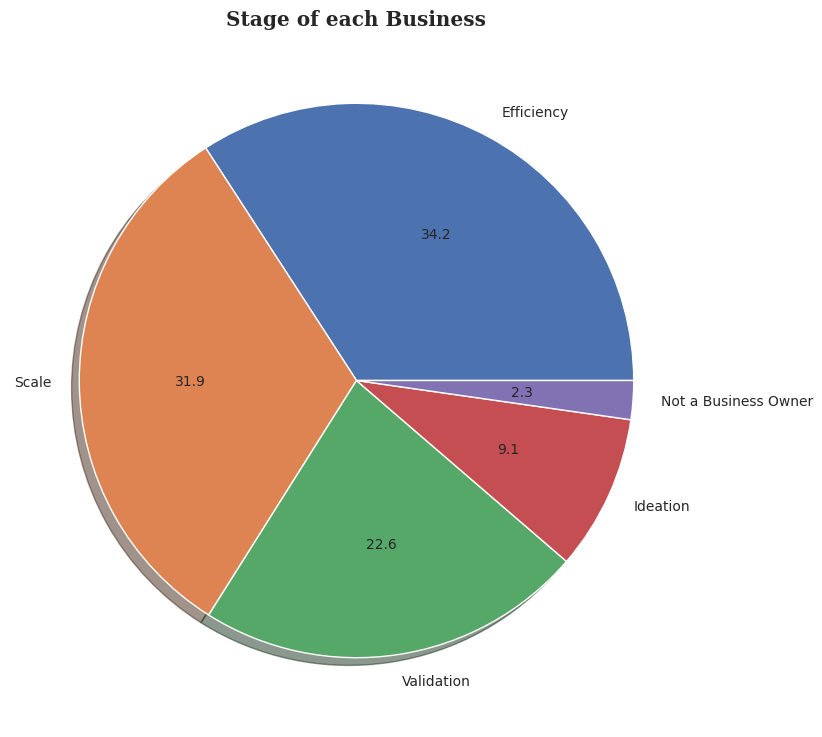

In [12]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Stage'].value_counts(dropna=False)
counts = counts[counts > 5]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Stage of each Business', fontproperties=font)
plt.show()

In [13]:
df['Industry'].value_counts(dropna=False)

Retail Trade                         95
Educational Services                 67
Arts and Entertainment               54
Health Care and Social Assistance    47
Advertising and Marketing            39
Manufacturing                        29
Accommodation and Food Services      27
Construction                         24
Finance and Insurance                23
Restaurant                           17
Agriculture                          14
Public Administration                13
Transportation and Warehousing       12
Real Estate                          10
Automotive                            5
Mining                                3
Government/Military                   3
Aerospace                             2
Biomedical                            1
Forestry                              1
Name: Industry, dtype: int64

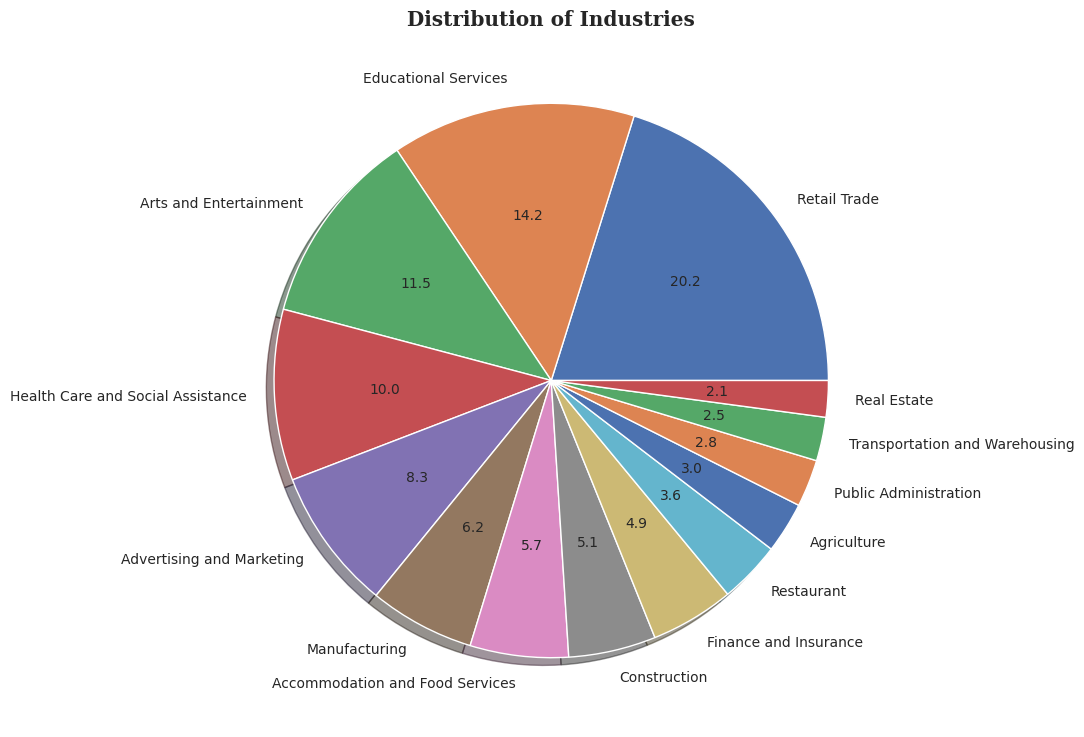

In [14]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Industry'].value_counts(dropna=False)
counts = counts[counts > 5]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Distribution of Industries', fontproperties=font)
plt.show()

In [15]:
df['Type'].value_counts(dropna=False)

Corporation - For Profit    219
Sole Proprietor             166
Unregistered                 50
Partnership                  23
Corporation - Non Profit     21
Charity                       5
Grassroots Non Profit         2
Name: Type, dtype: int64

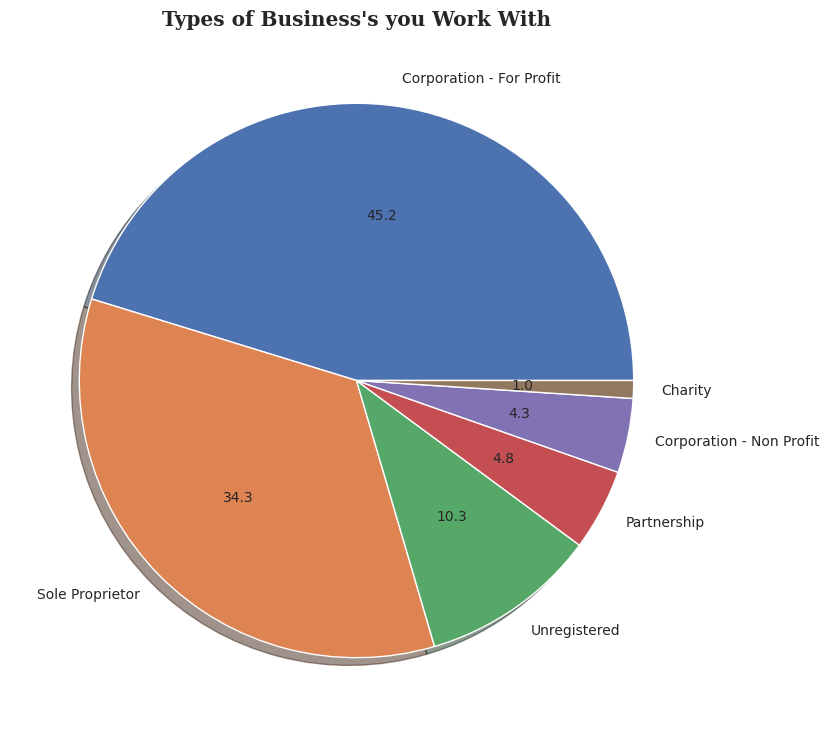

In [16]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Type'].value_counts(dropna=False)
counts = counts[counts > 2]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Types of Business\'s you Work With', fontproperties=font)
plt.show()

In [17]:
df['Business_Age'].value_counts(dropna=False)

1     217
3     166
6      67
10     36
Name: Business_Age, dtype: int64

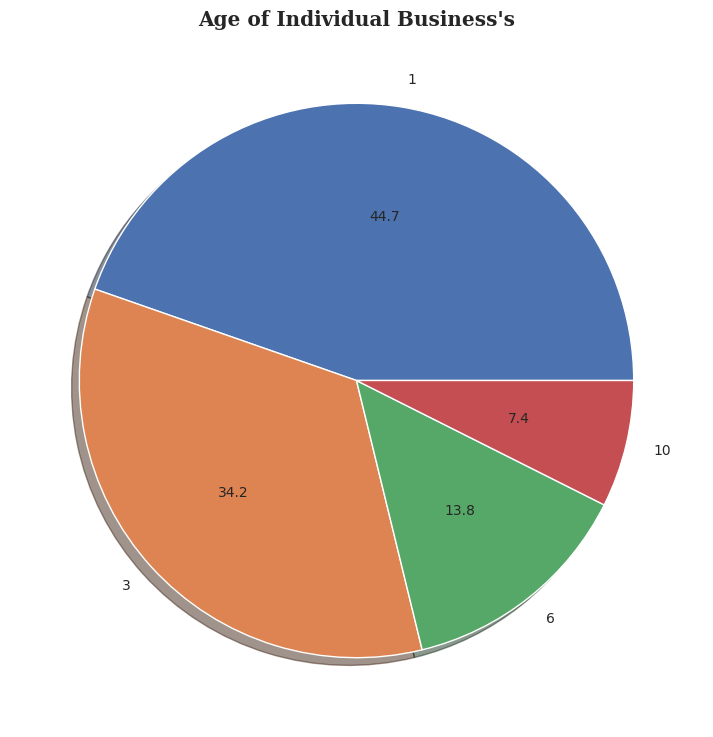

In [18]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Business_Age'].value_counts(dropna=False)
counts = counts[counts >= 1]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Age of Individual Business\'s', fontproperties=font)
plt.show()

In [19]:
df['Employee_Count'].value_counts(dropna=False)

3       153
0       151
1       146
6        24
10        9
20 +      3
Name: Employee_Count, dtype: int64

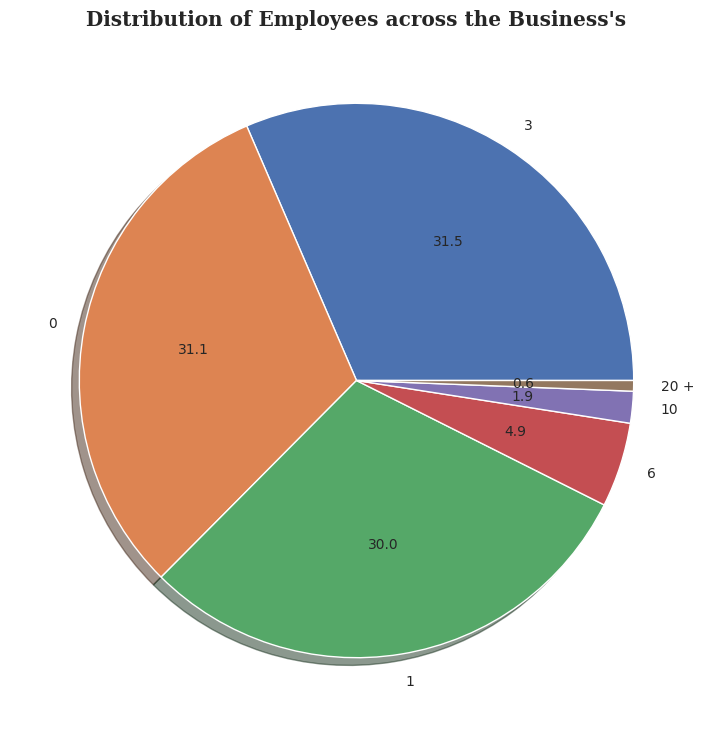

In [20]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Employee_Count'].value_counts(dropna=False)
counts = counts[counts >= 0]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Distribution of Employees across the Business\'s',fontproperties=font)
plt.show()

In [21]:
df['Require_Funding'].value_counts(dropna=False)

Yes    462
No      24
Name: Require_Funding, dtype: int64

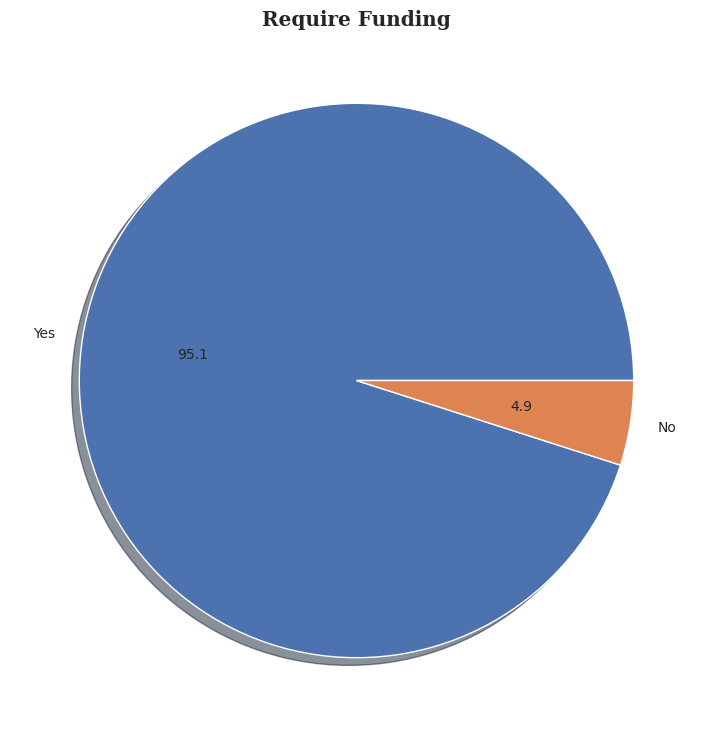

In [22]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Require_Funding'].value_counts(dropna=False)
counts = counts[counts >= 0]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Require Funding',fontproperties=font)
plt.show()

In [23]:
df['Fund_Type'].value_counts(dropna=False)

Grants                                                                                                                   169
Debt - Above $25,000, Grants                                                                                              49
Equity Investment, Grants                                                                                                 28
Debt - $5,001 - 15,000, Grants                                                                                            28
Debt - Above $25,000, Equity Investment, Grants                                                                           24
Debt - $500 - 5,000, Grants                                                                                               22
Debt - $5,001 - 15,000                                                                                                    17
Debt - $500 - 5,000                                                                                                       17


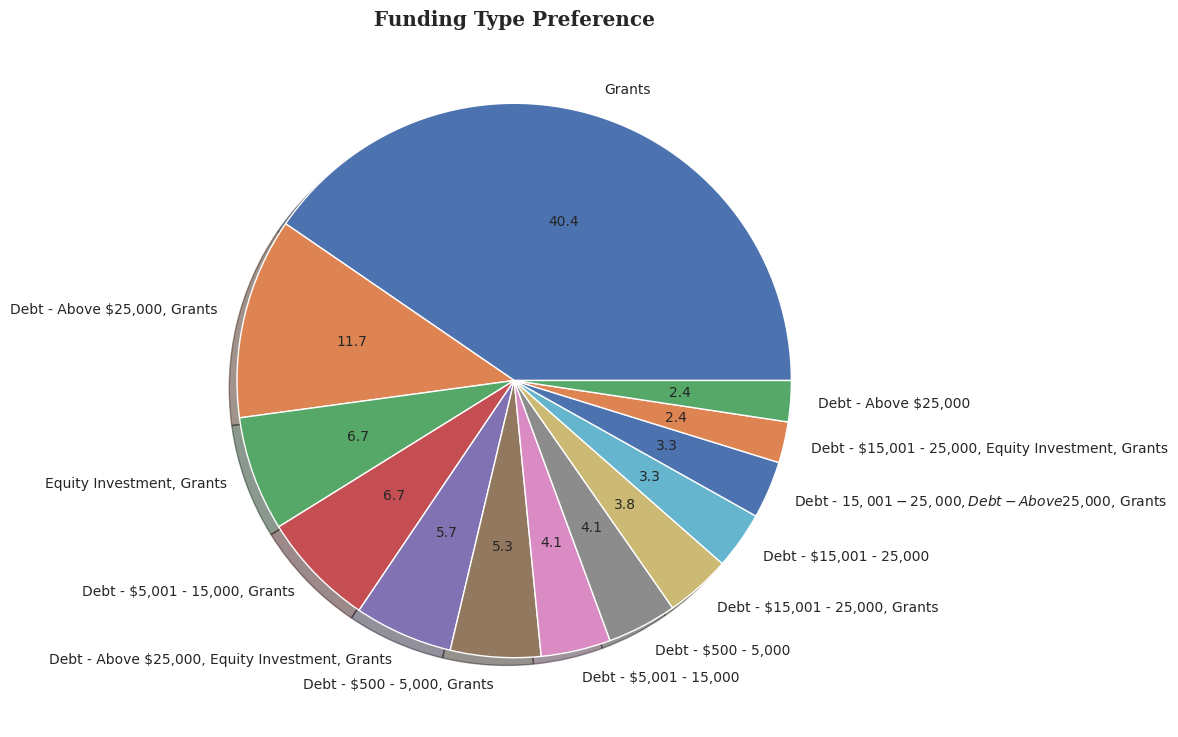

In [24]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Fund_Type'].value_counts(dropna=False)
counts = counts[counts >= 10]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Funding Type Preference', fontproperties=font)
plt.show()

In [25]:
df['ACBN_Relationship'].value_counts(dropna=False)

Business Owner    357
Community Ally     91
Organization       38
Name: ACBN_Relationship, dtype: int64

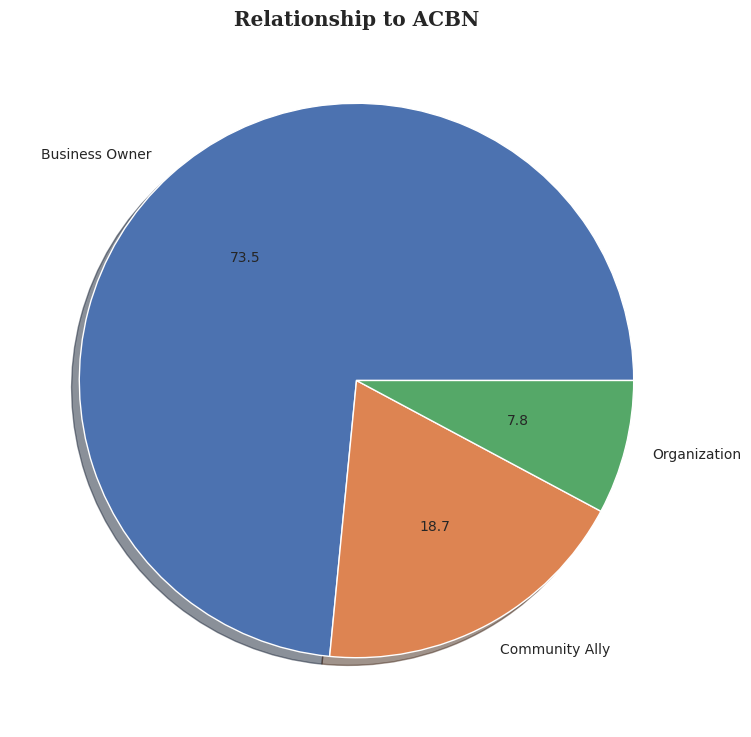

In [26]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['ACBN_Relationship'].value_counts(dropna=True)
counts = counts[counts >= 6]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Relationship to ACBN',fontproperties=font)
plt.show()

In [27]:
df['Referral'].value_counts(dropna=False)

nan                                   159
Friend or Colleague                   105
Attended Event                         61
Facebook                               27
Email Newsletter                       26
                                     ... 
R J Baker Financial and Consulting      1
BBCC                                    1
BBPA                                    1
NACO                                    1
BBC PROGRAM                             1
Name: Referral, Length: 70, dtype: int64

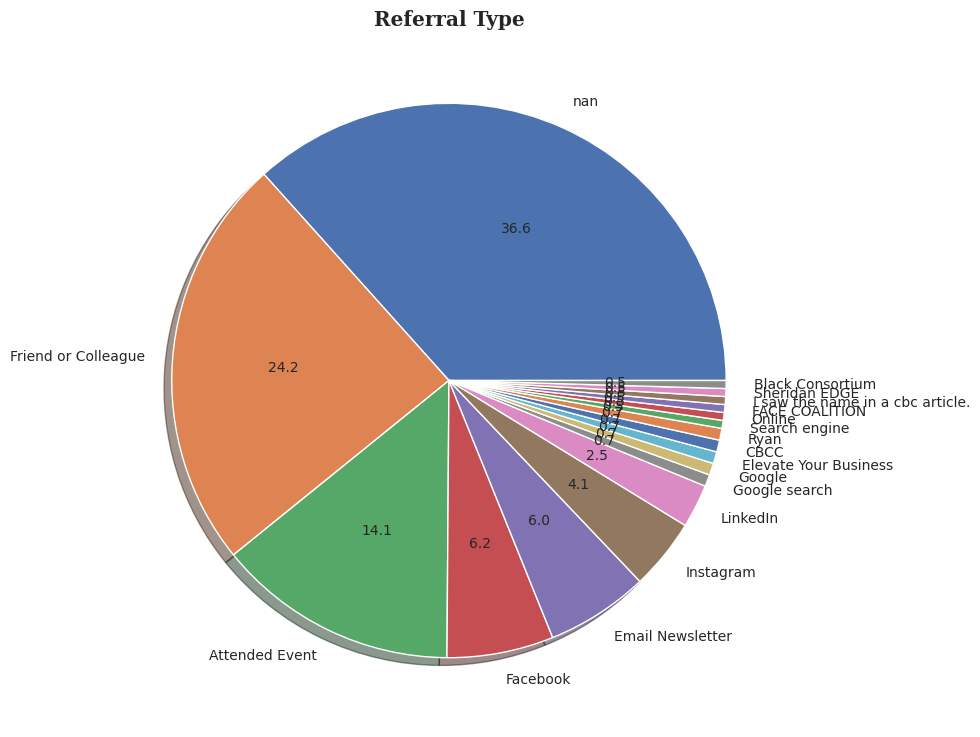

In [28]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Referral'].value_counts(dropna=True)
counts = counts[counts >= 2]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Referral Type',fontproperties=font)
plt.show()

In [29]:
df['Membership_Type'].value_counts(dropna=False)

None at the moment         190
Supporter - $9 month       106
nan                         75
Standard - $19.99 month     63
Premier - $47 month         29
Free                        22
Premier - $500 year          1
Name: Membership_Type, dtype: int64

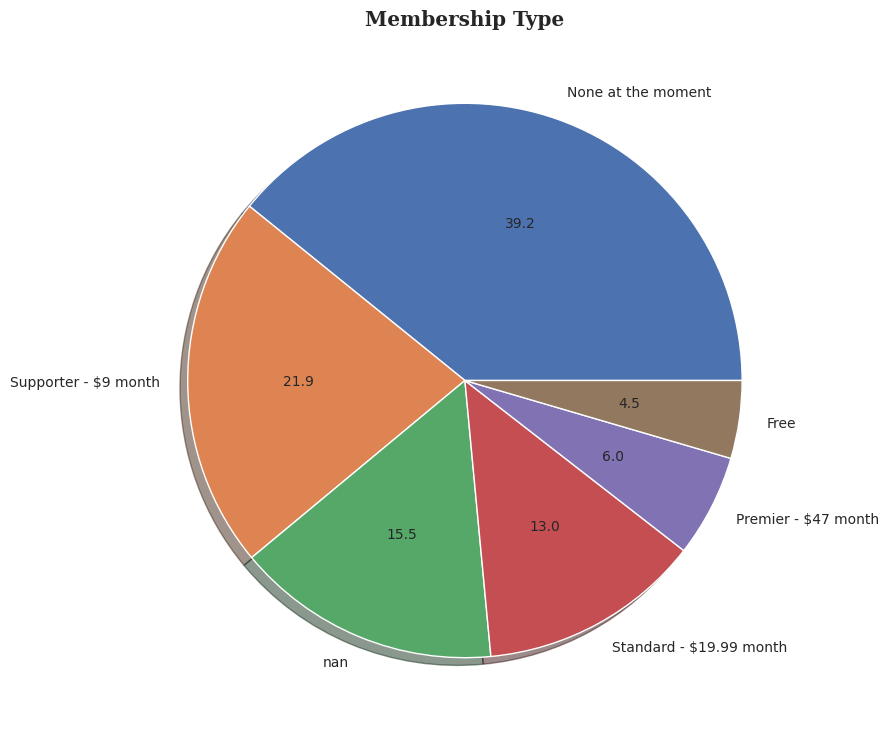

In [30]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_size('large')
font.set_weight('bold')
font.set_family('serif')

counts = df['Membership_Type'].value_counts(dropna=True)
counts = counts[counts >= 2]

plt.figure(figsize=(9,9))
plt.pie(counts, startangle=0, autopct='%.01f', labels=counts.index, shadow=True, textprops={'fontsize': 10})
plt.title('Membership Type',fontproperties=font)
plt.show()

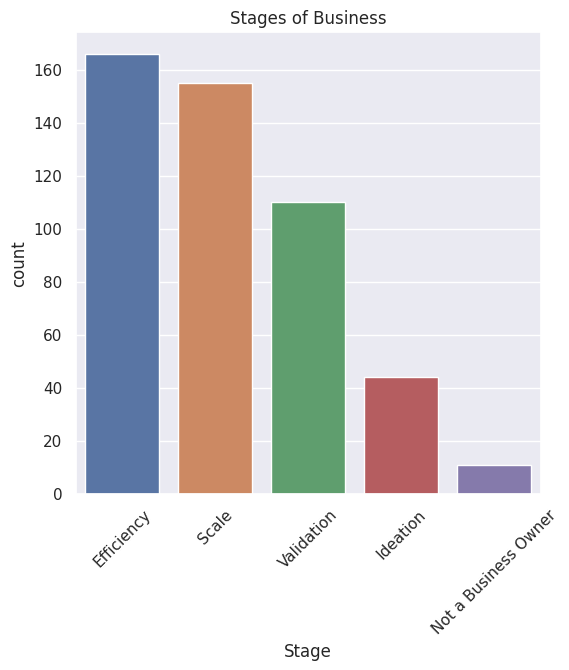

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(x='Stage', data=df)
plt.title('Stages of Business')

plt.xticks(rotation=45)  # Slant x-axis labels by 45 degrees

plt.show()

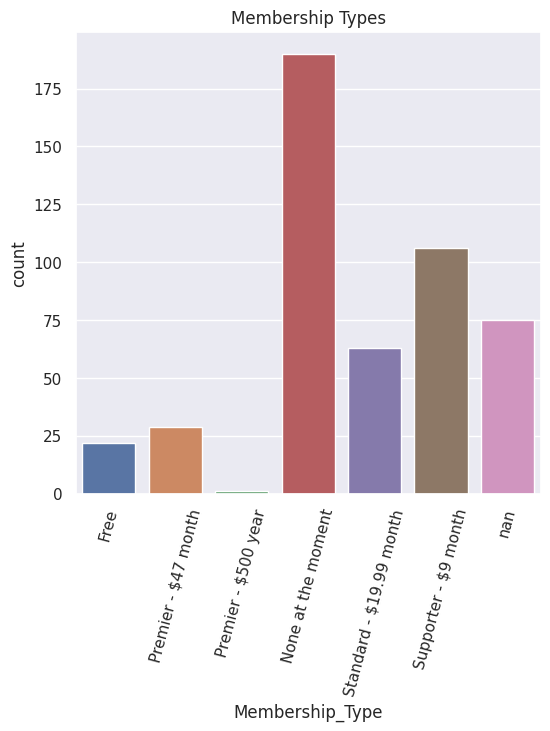

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(x='Membership_Type', data=df)
plt.title('Membership Types')

plt.xticks(rotation=75)  # Rotate x-axis labels by 45 degrees

plt.show()


In [100]:
df.columns

Index(['Address', 'Phone', 'Preferred_Contact', 'Stage', 'Industry', 'Type',
       'Inc_EOY', 'Business_Age', 'Employee_Count', 'Revenue_2021',
       'Revenue_2022', 'Require_Funding', 'Fund_Usage', 'Fund_Type',
       'Fund_Areas', 'ACBN_Relationship', 'Referral', 'Membership_Type'],
      dtype='object')

In [101]:
x = df[['Stage', 'Industry', 'Revenue_2021']]

In [102]:
x

,Stage,Industry,Revenue_2021
0,Efficiency,Retail Trade,6000
1,Scale,Restaurant,24000
2,Validation,Educational Services,6000
3,Efficiency,Public Administration,6000
4,Scale,Construction,24000
...,...,...,...
481,Efficiency,Accommodation and Food Services,24000
482,Efficiency,Construction,24000
483,Efficiency,Educational Services,6000
484,Scale,Automotive,24000


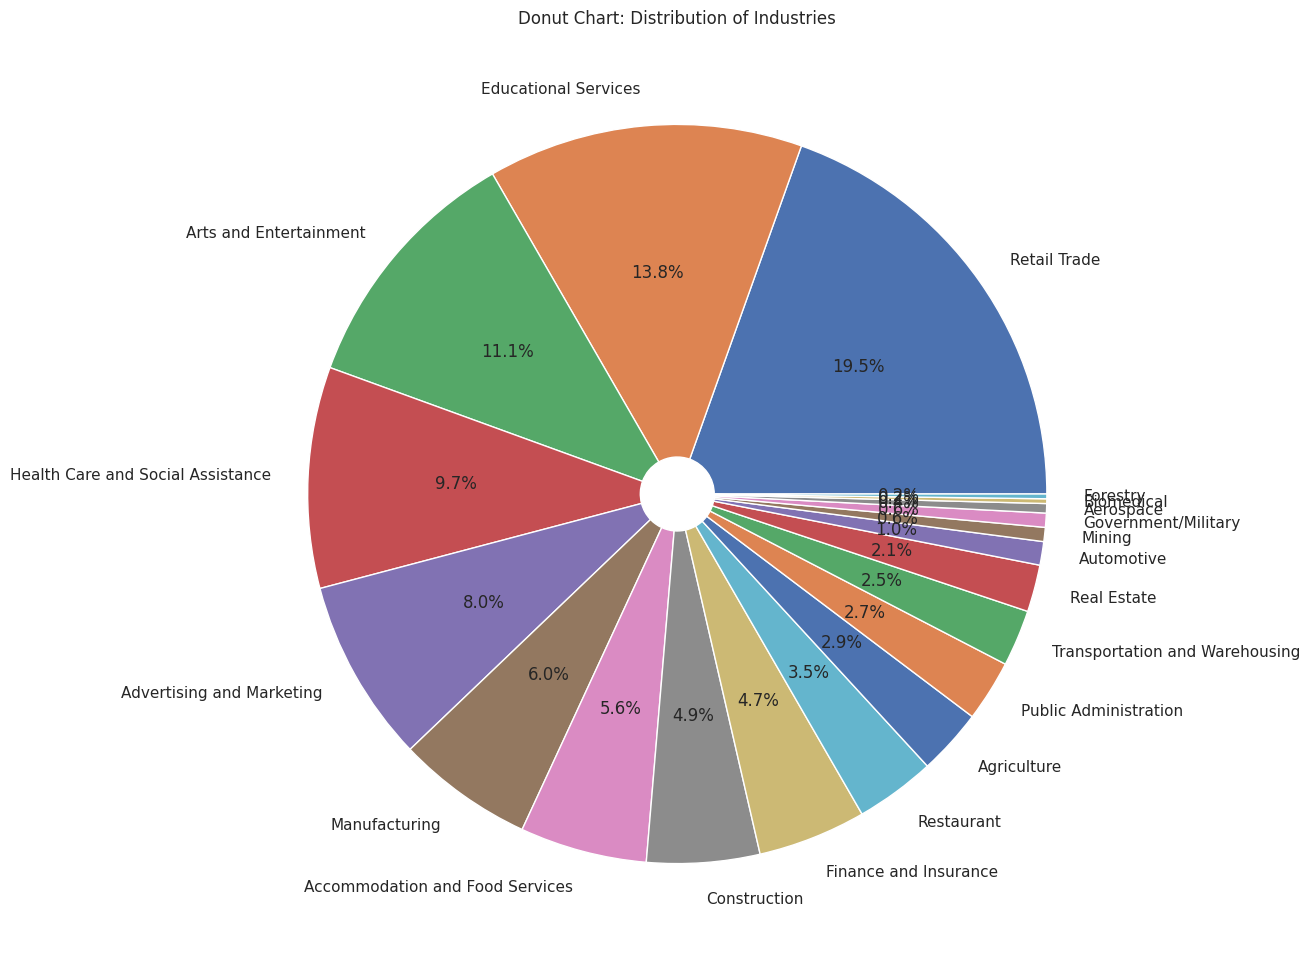

In [71]:
df_counts = df['Industry'].value_counts()
plt.figure(figsize=(15, 12))
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=.9))
plt.title('Donut Chart: Distribution of Industries')
plt.show()


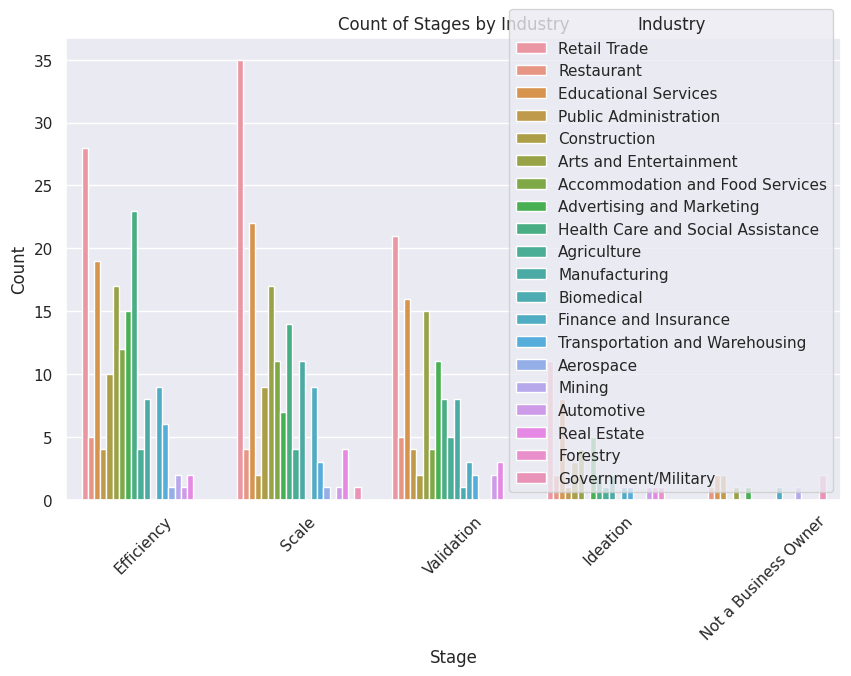

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Stage', hue='Industry', data=df)
plt.title('Count of Stages by Industry')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()

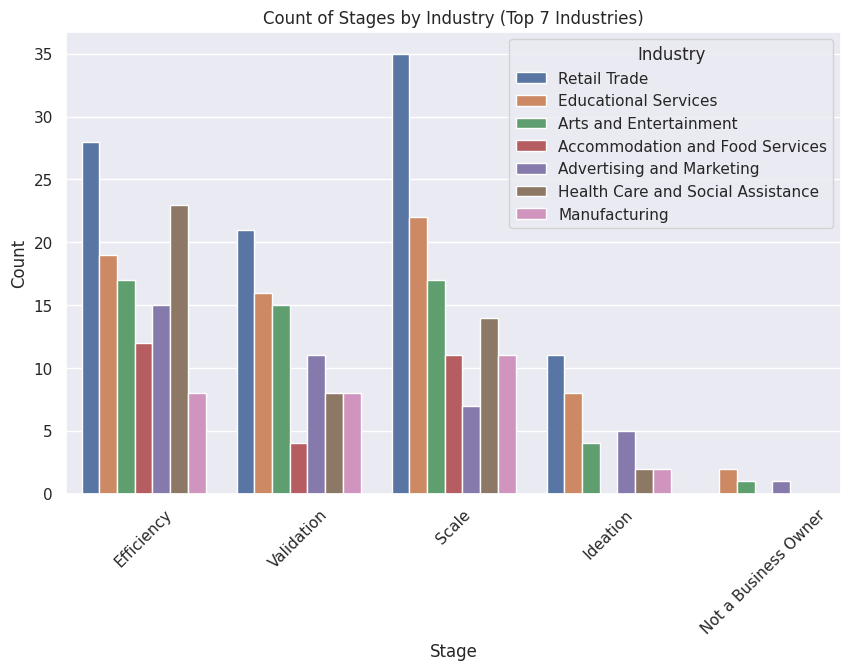

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the top 7 industries
top_industries = df['Industry'].value_counts().nlargest(7).index
df_filtered = df[df['Industry'].isin(top_industries)]

plt.figure(figsize=(10, 6))
sns.countplot(x='Stage', hue='Industry', data=df_filtered)
plt.title('Count of Stages by Industry (Top 7 Industries)')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()


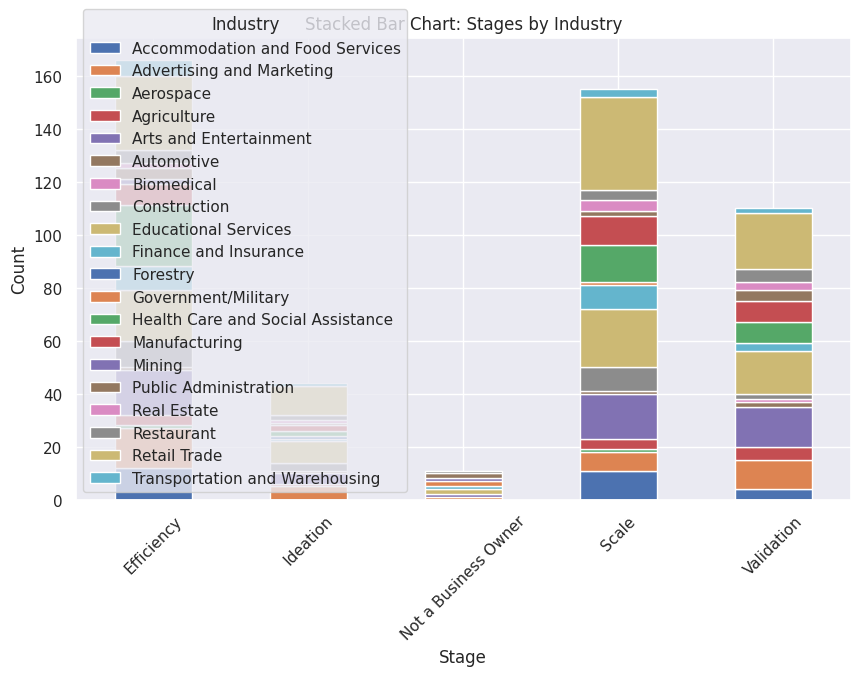

In [53]:
import pandas as pd

df_cross = pd.crosstab(df['Stage'], df['Industry'])
df_cross.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart: Stages by Industry')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()

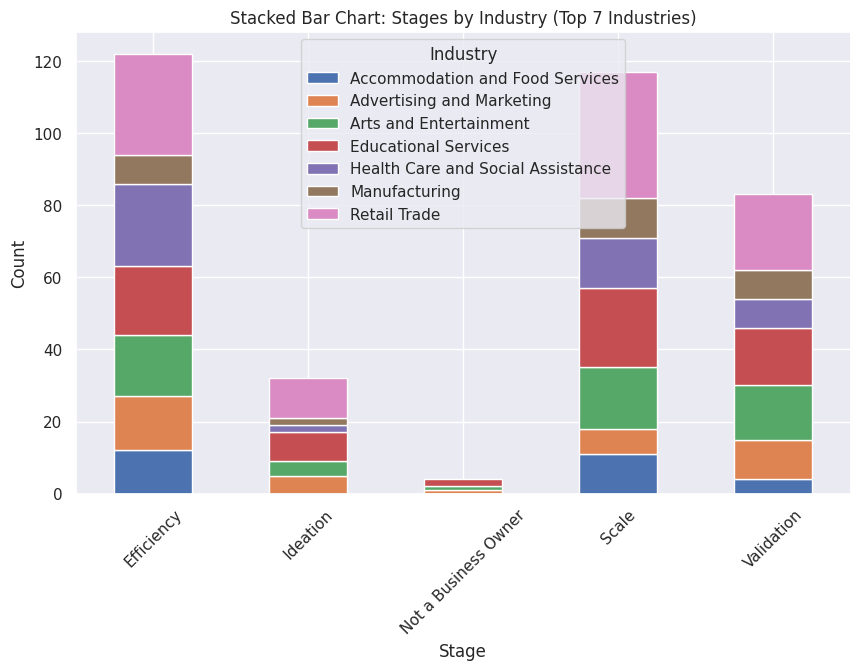

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the top 7 industries
top_industries = df['Industry'].value_counts().nlargest(7).index
df_filtered = df[df['Industry'].isin(top_industries)]

df_cross = pd.crosstab(df_filtered['Stage'], df_filtered['Industry'])
df_cross.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart: Stages by Industry (Top 7 Industries)')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()


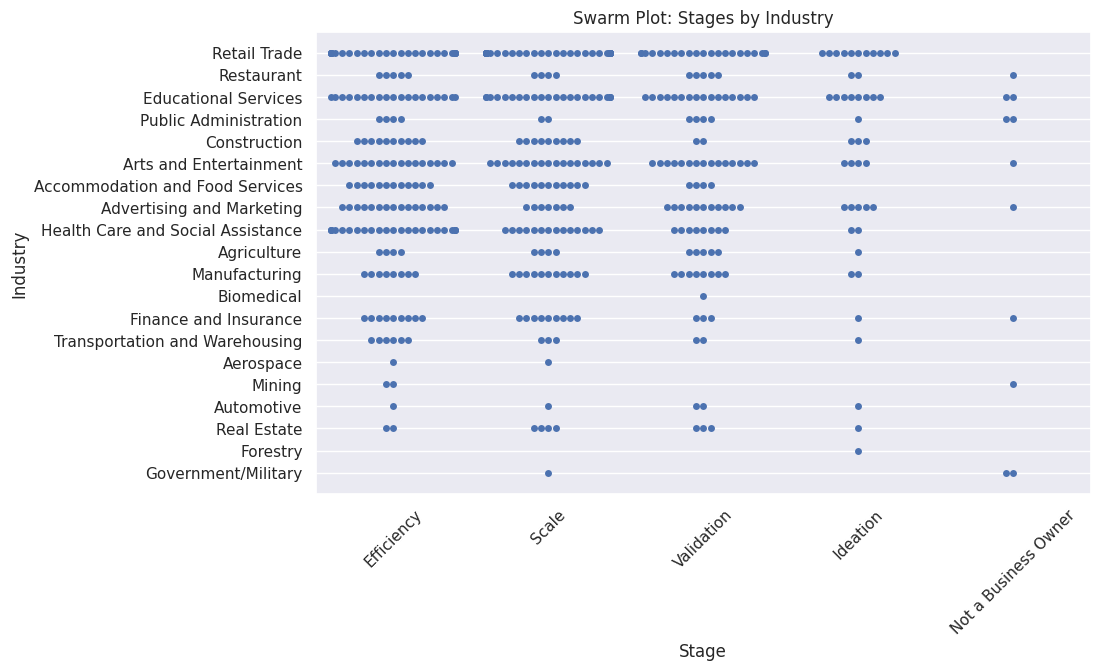

In [58]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Stage', y='Industry', data=df)
plt.title('Swarm Plot: Stages by Industry')
plt.xlabel('Stage')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.show()

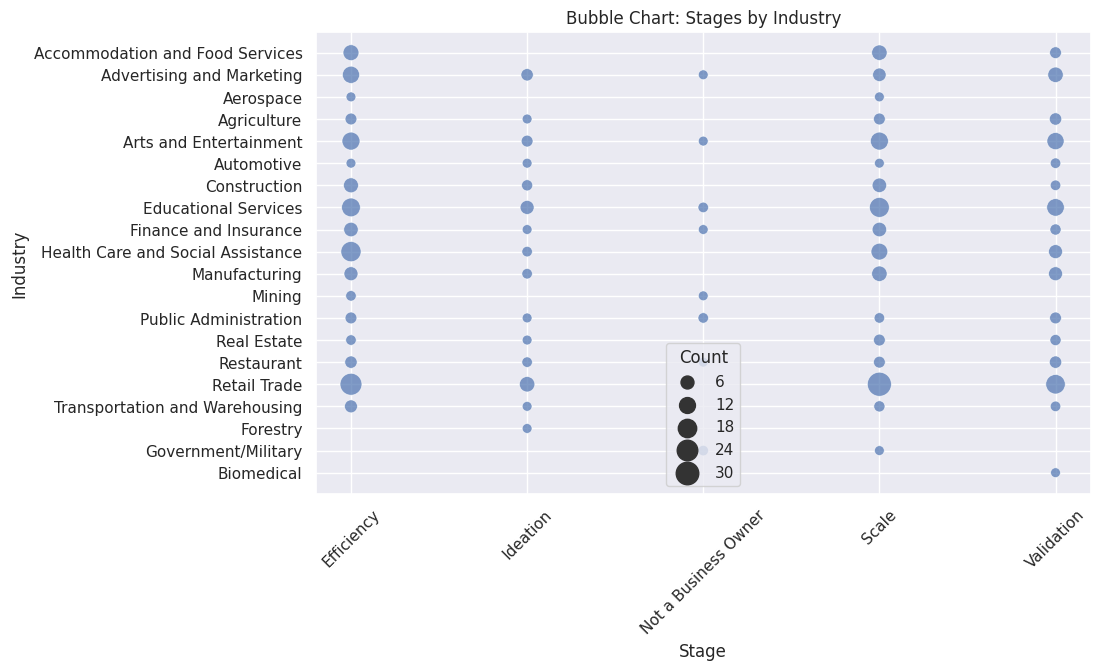

In [74]:
df_counts = df.groupby(['Stage', 'Industry']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stage', y='Industry', size='Count', data=df_counts, sizes=(50, 300), alpha=0.7)
plt.title('Bubble Chart: Stages by Industry')
plt.xlabel('Stage')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.show()

In [87]:
import plotly.express as px

df_counts = df.groupby(['Stage', 'Industry']).size().reset_index(name='Count')

fig = px.treemap(df_counts, path=['Stage', 'Industry'], values='Count')
fig.update_layout(title='Treemap: Stages by Industry')

fig.show()


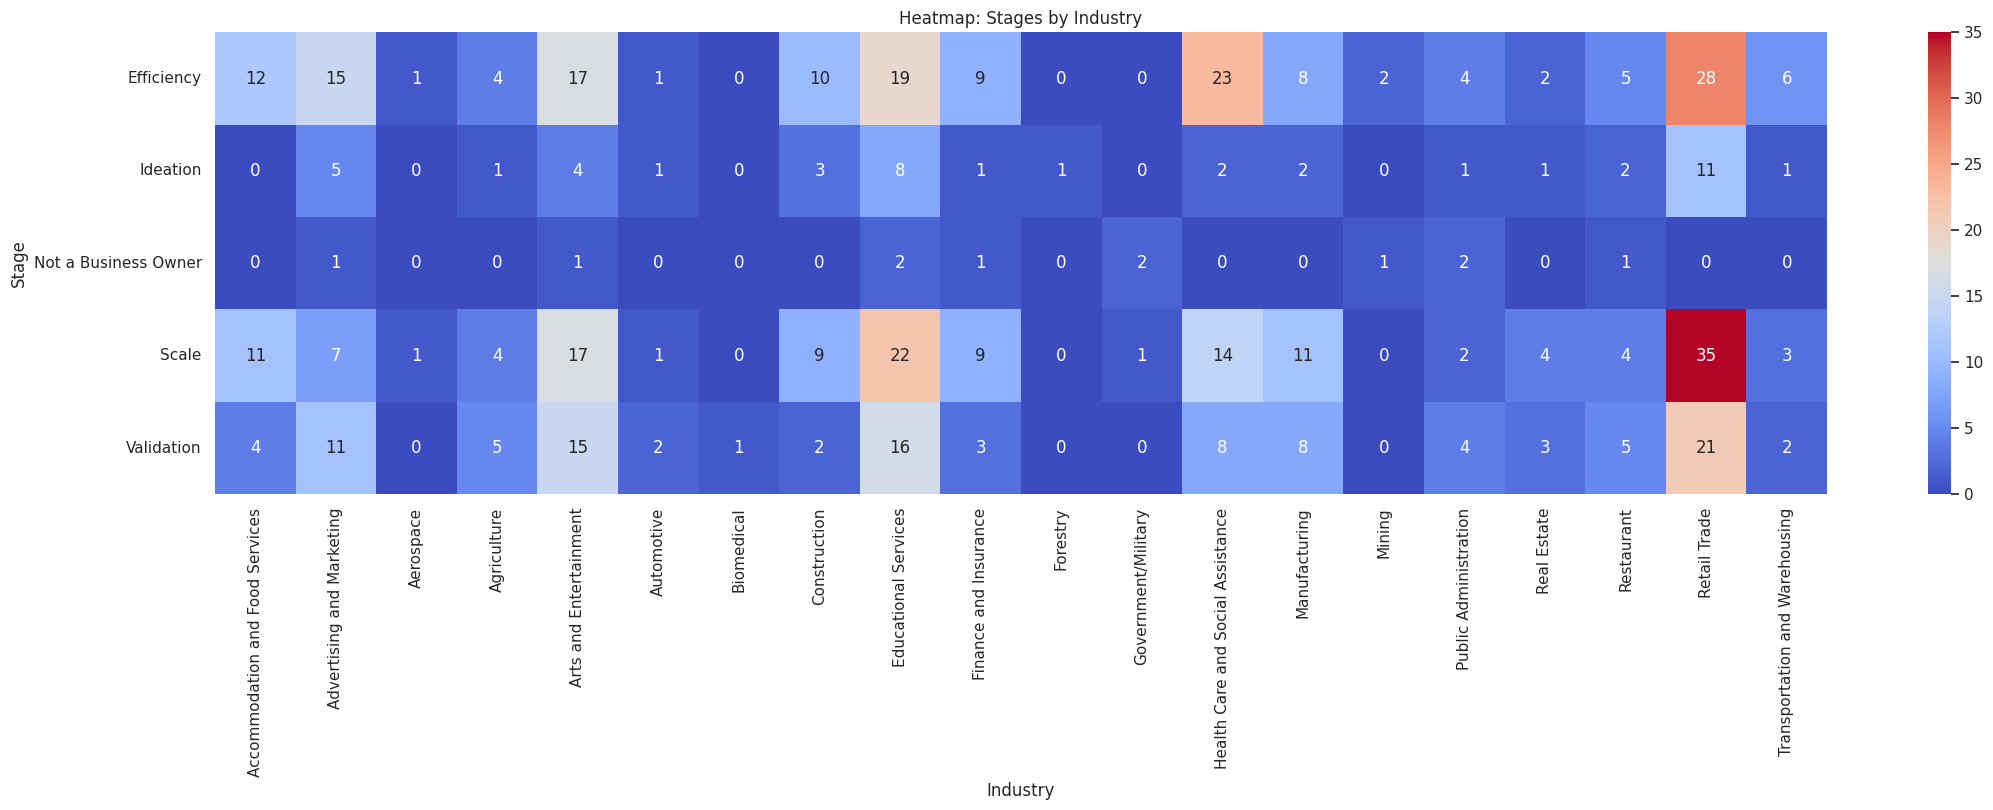

In [99]:
df_pivot = df.pivot_table(index='Stage', columns='Industry', aggfunc='size', fill_value=0)
plt.figure(figsize=(26, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap: Stages by Industry')
plt.xlabel('Industry')
plt.ylabel('Stage')
plt.show()

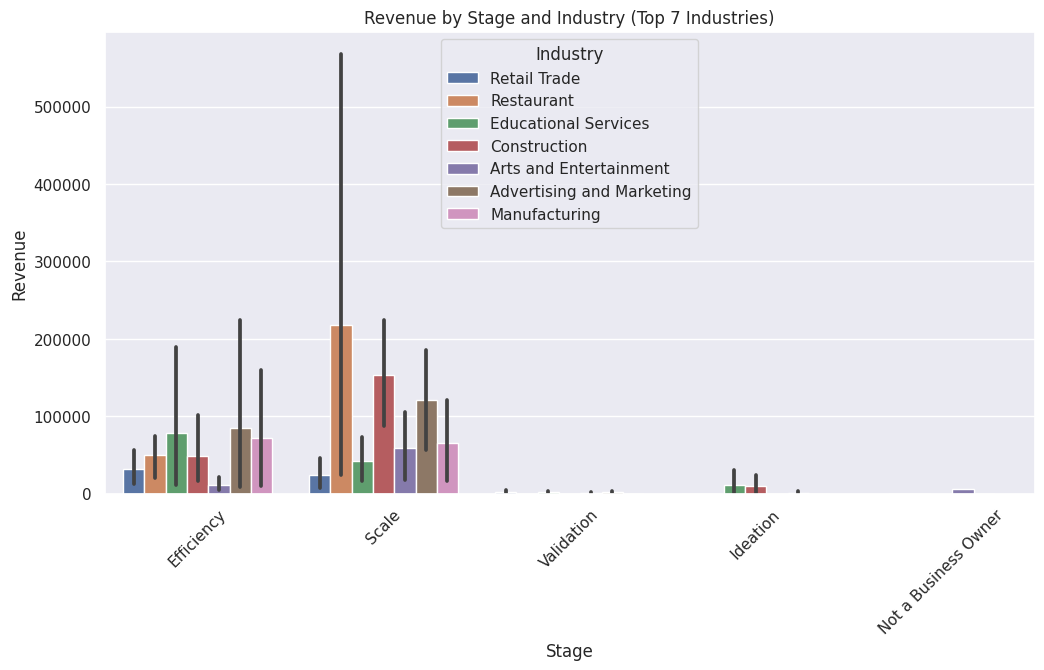

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

top_industries = df.groupby('Industry')['Revenue_2021'].sum().nlargest(7).index
df_filtered = df[df['Industry'].isin(top_industries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Stage', y='Revenue_2021', hue='Industry', data=df_filtered)
plt.title('Revenue by Stage and Industry (Top 7 Industries)')
plt.xlabel('Stage')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()


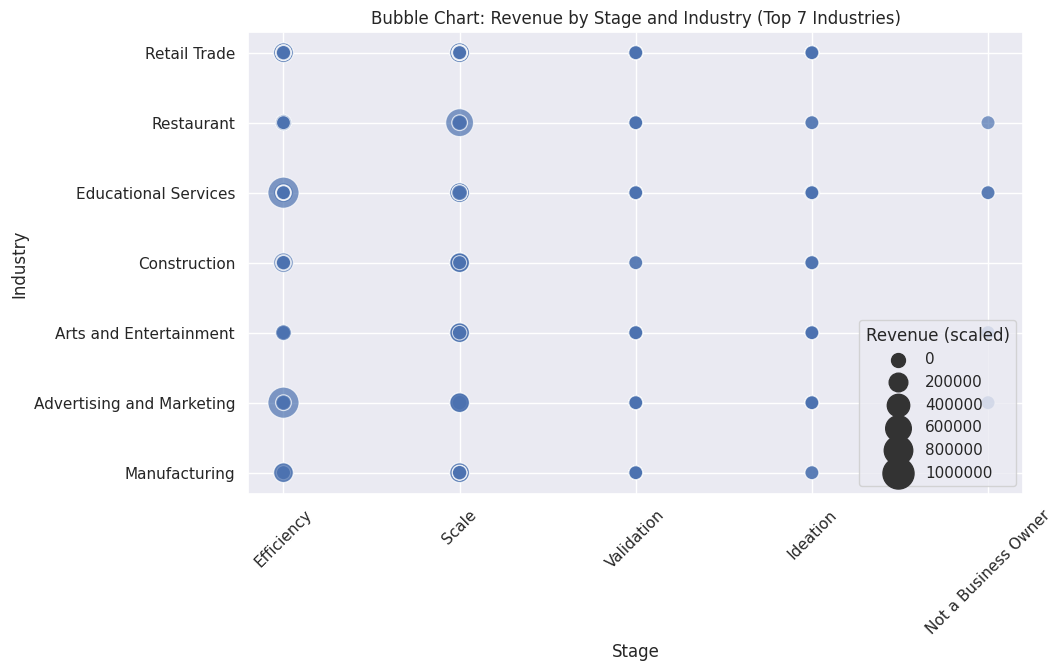

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the top 7 industries
top_industries = df.groupby('Industry')['Revenue_2021'].sum().nlargest(7).index
df_filtered = df[df['Industry'].isin(top_industries)]

plt.figure(figsize=(10, 6))
# Scale down the revenue values by dividing by a constant
size_scaling_factor = 1000
sns.scatterplot(x='Stage', y='Industry', size='Revenue_2021', sizes=(100, 500),
                data=df_filtered, alpha=0.7)
plt.title('Bubble Chart: Revenue by Stage and Industry (Top 7 Industries)')
plt.xlabel('Stage')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.legend(title='Revenue (scaled)')
plt.show()


In [120]:
import plotly.express as px

df_grouped = df_filtered.groupby(['Stage', 'Industry']).sum().reset_index()

fig = px.treemap(df_grouped, path=['Stage', 'Industry'], values='Revenue_2021')
fig.update_layout(title='Treemap: Revenue by Stage and Industry (Top 7 Industries)')

fig.show()


In [127]:
import plotly.express as px

df_grouped = df_filtered.groupby(['Stage', 'Industry']).sum().reset_index()

fig = px.sunburst(df_grouped, path=['Stage', 'Industry'], values='Revenue_2021')
fig.update_layout(title='Donut Chart: Revenue by Stage and Industry (Top 7 Industries)', width=2000, height=900)

fig.show()


In [134]:
import folium
from geopy.geocoders import Nominatim

# Create a map centered on the GTA area in Ontario
map_center = [43.6532, -79.3832]  # Latitude and longitude of GTA area
zoom_level = 10  # Adjust the zoom level as desired
map = folium.Map(location=map_center, zoom_start=zoom_level)

# Geocode the addresses and add markers to the map
geolocator = Nominatim(user_agent="my-app")  # Initialize the geocoder

for index, row in df.iterrows():
    address = row['Address']
    
    try:
        location = geolocator.geocode(address)
        if location:
            latitude = location.latitude
            longitude = location.longitude
            popup_text = f"Address: {address}<br>Latitude: {latitude}<br>Longitude: {longitude}"
            folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(map)
    except:
        continue

# Display the map
map
